In [12]:
%load_ext autoreload
%autoreload 2

import pandas as pd
from sklearn import preprocessing
import numpy as np
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import os.path
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from os.path import join
import dvu
dvu.set_style()
from collections import defaultdict
import imodelsx.process_results
results_dir = '../results/classification'

r = imodelsx.process_results.get_results_df(results_dir)
experiment_filename = '../experiments/02_classification.py'
r = imodelsx.process_results.fill_missing_args_with_default(
    r, experiment_filename)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


100%|██████████| 40/40 [00:00<00:00, 1907.87it/s]


In [13]:
means = [k for k in r.columns if k.startswith('mean_')]

In [15]:
r['label_name'] = r['label_name'].apply(lambda x: x.split('___')[1])
df = r.groupby(by=['label_name', 'model_name', 'input_text'])[means].mean()

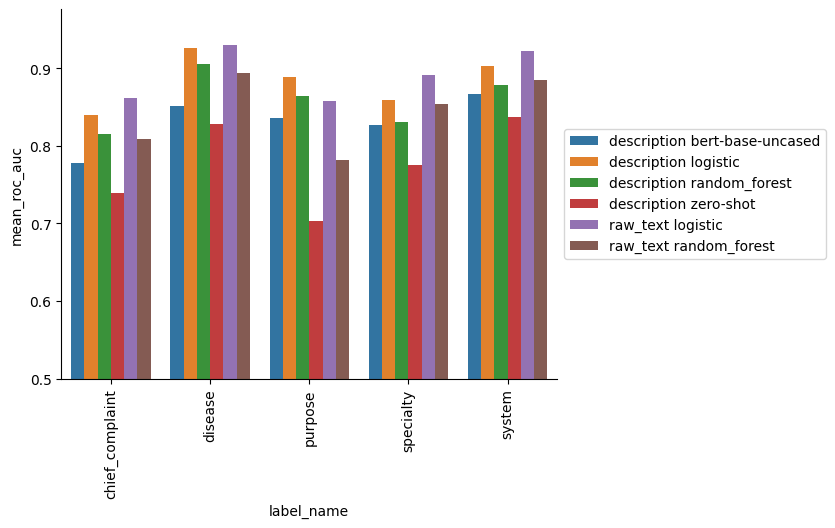

In [18]:
# rotate xticklabels
d = df.reset_index()
d['legend'] = d['input_text'] + ' ' + d['model_name']
d = d[d.model_name != 'decision_tree']
ax = sns.barplot(data=d, x='label_name',
                 y='mean_roc_auc', hue='legend', hue_order=sorted(d['legend'].unique()))
plt.xticks(rotation=90)
plt.ylim(bottom=0.5)
# legend to right
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()